In [1]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()       masks S4Vectors::rename()


In [3]:
library(ggrepel)

In [4]:
setwd('/home/wpy/stereoseq/20240502-SPACseq')
df <- read.csv('./RNA/Group_sgCd44_vs_sginter_DESeq2.txt', sep="\t")

In [5]:
options(repr.plot.width = 20, repr.plot.height = 10)

Warning message:
“Removed 41831 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 41831 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 136 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


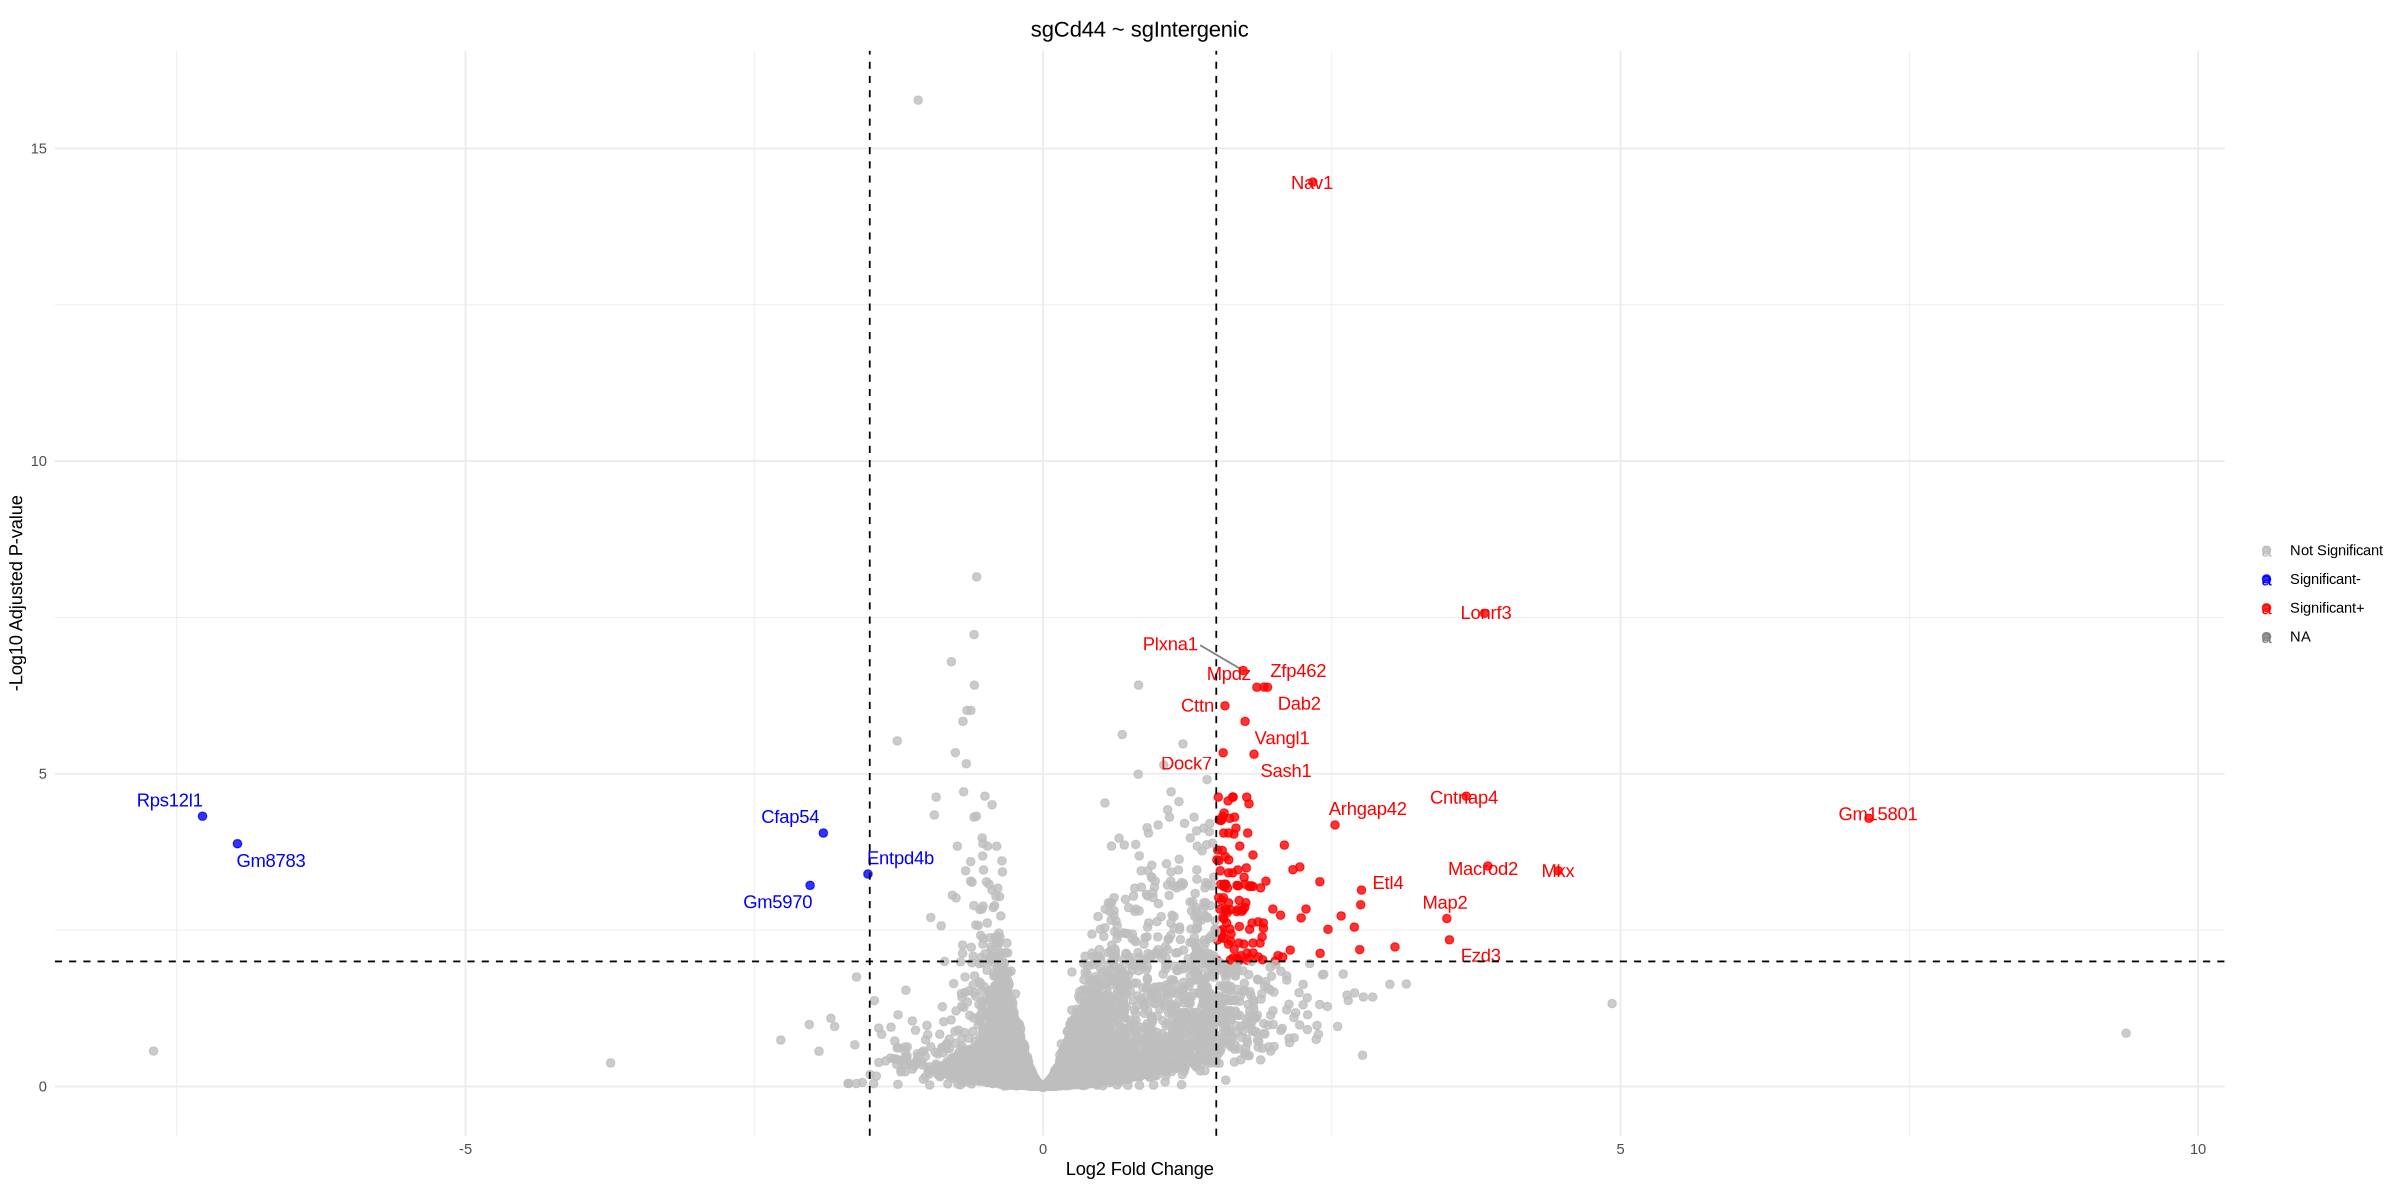

In [6]:
padj_threshold <- 0.01
log2FC_threshold <- 1.5

df <- df %>%
  mutate(significance = ifelse(padj > padj_threshold | abs(log2FoldChange) <= log2FC_threshold, "Not Significant", ifelse(log2FoldChange > log2FC_threshold, "Significant+", "Significant-")))

volcano_plot <- ggplot(df, aes(x = log2FoldChange, y = -log10(padj), color = significance, label = ifelse(significance == "Significant+" | significance == "Significant-", Gene_name, ""))) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_manual(values = c("Significant+" = "red", "Not Significant" = "grey", 'Significant-' = "blue")) +
  theme_minimal() +
  labs(
    title = "sgCd44 ~ sgIntergenic",
    x = "Log2 Fold Change",
    y = "-Log10 Adjusted P-value"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.title = element_blank()
  ) +
  geom_text_repel(
    aes(label = ifelse(significance == "Significant+" | significance == "Significant-", as.character(Gene_name), "")),
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.3, "lines"),
    segment.color = 'grey50'
  ) +
  geom_hline(yintercept = -log10(padj_threshold), linetype = "dashed", color = "black") +
  geom_vline(xintercept = c(-log2FC_threshold, log2FC_threshold), linetype = "dashed", color = "black")

volcano_plot <- volcano_plot + theme(
  aspect.ratio = 0.5
)

print(volcano_plot)


In [5]:
library(clusterProfiler)
library(org.Mm.eg.db)
library(DOSE)
library(AnnotationDbi)



clusterProfiler v4.10.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:purrr’:

    simplify


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:clusterProfiler’:

    select


The following object is masked from ‘package:dplyr’:

    select




DOSE v3.28.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you u

In [7]:
padj_threshold <- 0.05
log2FC_threshold <- 0.5

df <- df %>%
  mutate(significance = ifelse(padj > padj_threshold | abs(log2FoldChange) <= log2FC_threshold, "Not Significant", ifelse(log2FoldChange > log2FC_threshold, "Significant+", "Significant-")))

df <- read.csv('./RNA/Group_sgCd44_vs_sginter_DESeq2.txt', sep="\t")
df$entrez <- mapIds(org.Mm.eg.db, keys = df$Gene_name, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
df <- na.omit(df)

gene_list <- df$log2FoldChange
names(gene_list) <- df$entrez
gene_list <- sort(gene_list, decreasing=TRUE)

'select()' returned 1:1 mapping between keys and columns



In [8]:
gsea_results <- gseGO(geneList = gene_list, OrgDb = org.Mm.eg.db, ont="ALL", nPerm = 1000, minGSSize = 10, maxGSSize = 500, pvalueCutoff = 0.05, verbose = TRUE)

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in fgseaSimple(pathways = pathways, stats = stats, minSize = minSize, :
“There were 16 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”
leading edge analysis...

done...



In [23]:
head(result_df)

,ONTOLOGY,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0005604,CC,GO:0005604,basement membrane,57,0.8180026,2.052737,0.001062699,0.01271255,0.009498317,1422,"tags=68%, list=11%, signal=61%",210530/57764/12836/18208/16782/13640/69675/12830/18858/20692/11504/94352/15530/18073/21857/21923/12831/12827/16777/12822/12361/14268/12826/58859/21858/22041/56401/16776/14873/16403/114249/12476/22339/226519/13138/14114/11603/17181/665700
GO:0005201,MF,GO:0005201,extracellular matrix structural constituent,62,0.8003782,2.023299,0.001061571,0.01271255,0.009498317,1442,"tags=69%, list=11%, signal=62%",12835/12825/12836/107581/18208/14119/53867/16782/268977/69675/12830/20692/15530/13003/18073/20563/21923/12831/12827/16777/21825/94242/12822/76477/14268/12826/108075/58859/16012/13601/17304/330790/81877/12833/16776/114249/94214/226519/14114/11603/17181/665700/12842
GO:0021536,BP,GO:0021536,diencephalon development,38,0.8447504,2.020619,0.001127396,0.01271255,0.009498317,1312,"tags=61%, list=10%, signal=54%",14633/21416/12156/15114/20674/20346/15205/20356/18844/15364/16392/18187/68169/18508/14461/24136/20349/18740/319757/12166/17967/18846/18186
GO:0014033,BP,GO:0014033,neural crest cell differentiation,61,0.7960371,2.011335,0.001060445,0.01271255,0.009498317,1471,"tags=57%, list=12%, signal=51%",65100/20346/15205/20682/20471/20356/16392/22160/12558/18187/16449/17311/18508/22772/17300/18505/14268/24136/21418/20349/11477/319757/12166/20359/14042/20360/20353/16776/13641/18186/70769/17260/20350/100169/20352
GO:0001708,BP,GO:0001708,cell fate specification,56,0.8015446,2.008565,0.001068376,0.01271255,0.009498317,1231,"tags=39%, list=10%, signal=36%",14633/76365/21386/20674/14048/20682/18028/20471/16392/21679/21384/209448/18508/18032/14634/14369/15396/14182/319757/12166/18027/15376
GO:0007411,BP,GO:0007411,axon guidance,128,0.7673133,2.007943,0.001014199,0.01271255,0.009498317,1490,"tags=52%, list=12%, signal=47%",14365/14633/12064/68810/18845/20346/18028/18208/20356/18007/18844/16392/70433/14009/13640/13636/15228/399558/18187/13866/20563/18508/22772/22152/269878/75847/12168/13838/18612/58235/107449/14634/20349/319757/16971/11735/13642/235472/20359/140570/107515/14042/13800/20360/12569/20353/16776/19274/235611/11787/22339/17967/76260/18846/13641/73710/13138/20187/52666/18186/11603/232906/17181/17260/20350/20352/108699


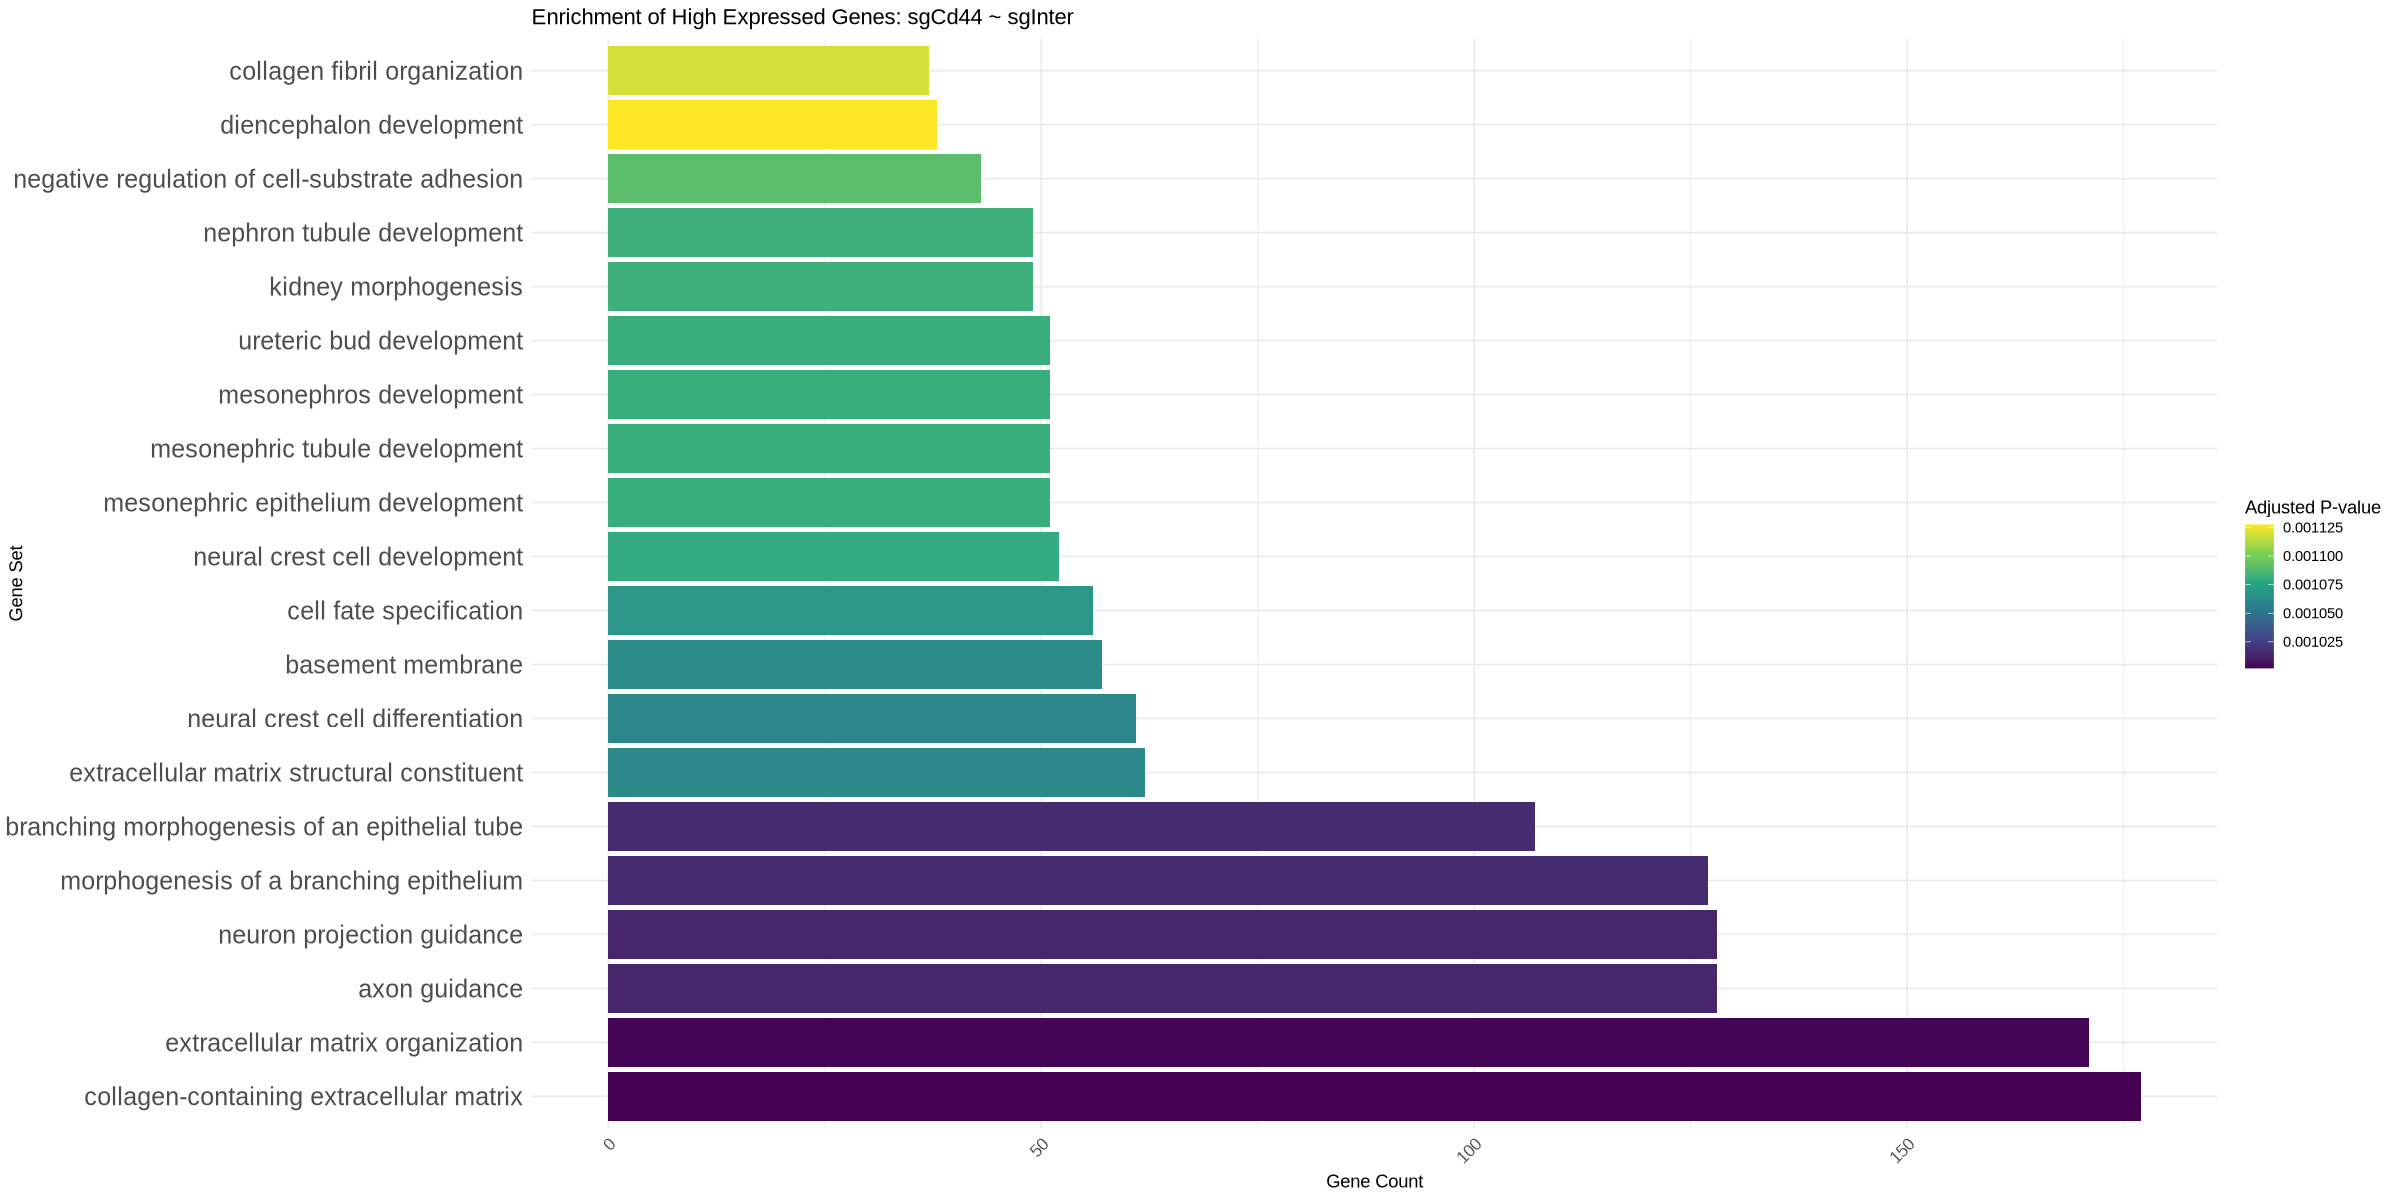

In [37]:
library(ggplot2)

# 提取 GSEA 结果数据
result_df <- as.data.frame(gsea_results@result)

# 选择要展示的前 20 个基因集
top_results <- head(result_df, 20)

# 绘制条形图
ggplot(top_results, aes(x = reorder(Description, -setSize), y = setSize, fill = pvalue)) +
    geom_bar(stat = "identity") +
    scale_fill_continuous(type = "viridis") + # 使用连续颜色表示 p 值
    coord_flip() + # 翻转坐标轴使条形图水平显示
    labs(title = "Enrichment of High Expressed Genes: sgCd44 ~ sgInter", x = "Gene Set", y = "Gene Count", fill = "Adjusted P-value") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10),axis.text.y = element_text(angle = 0, hjust = 1, size = 15))


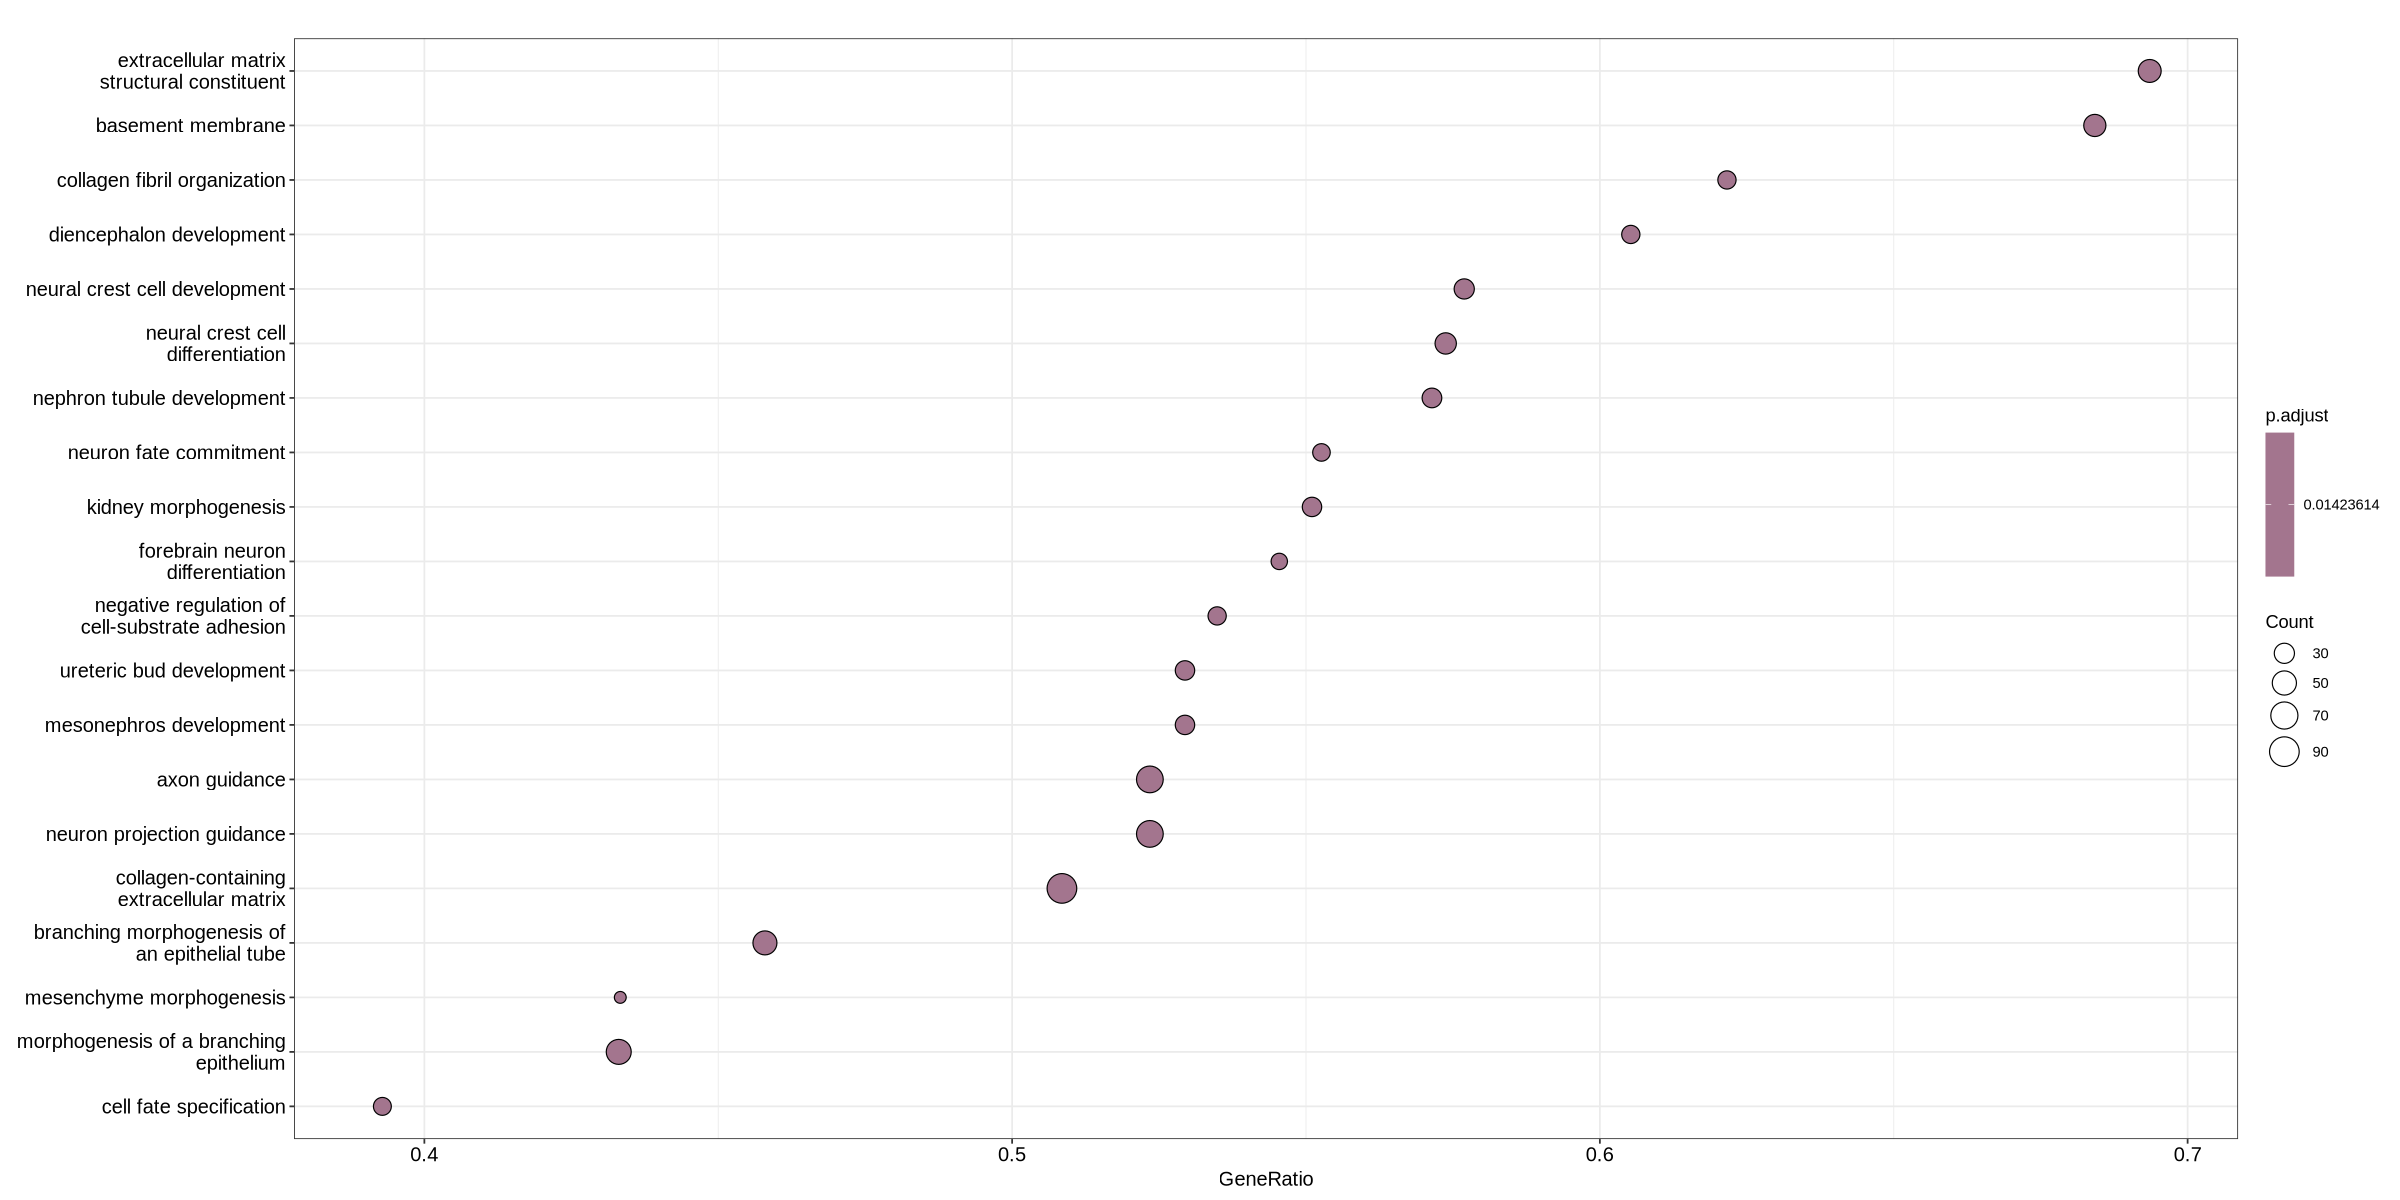

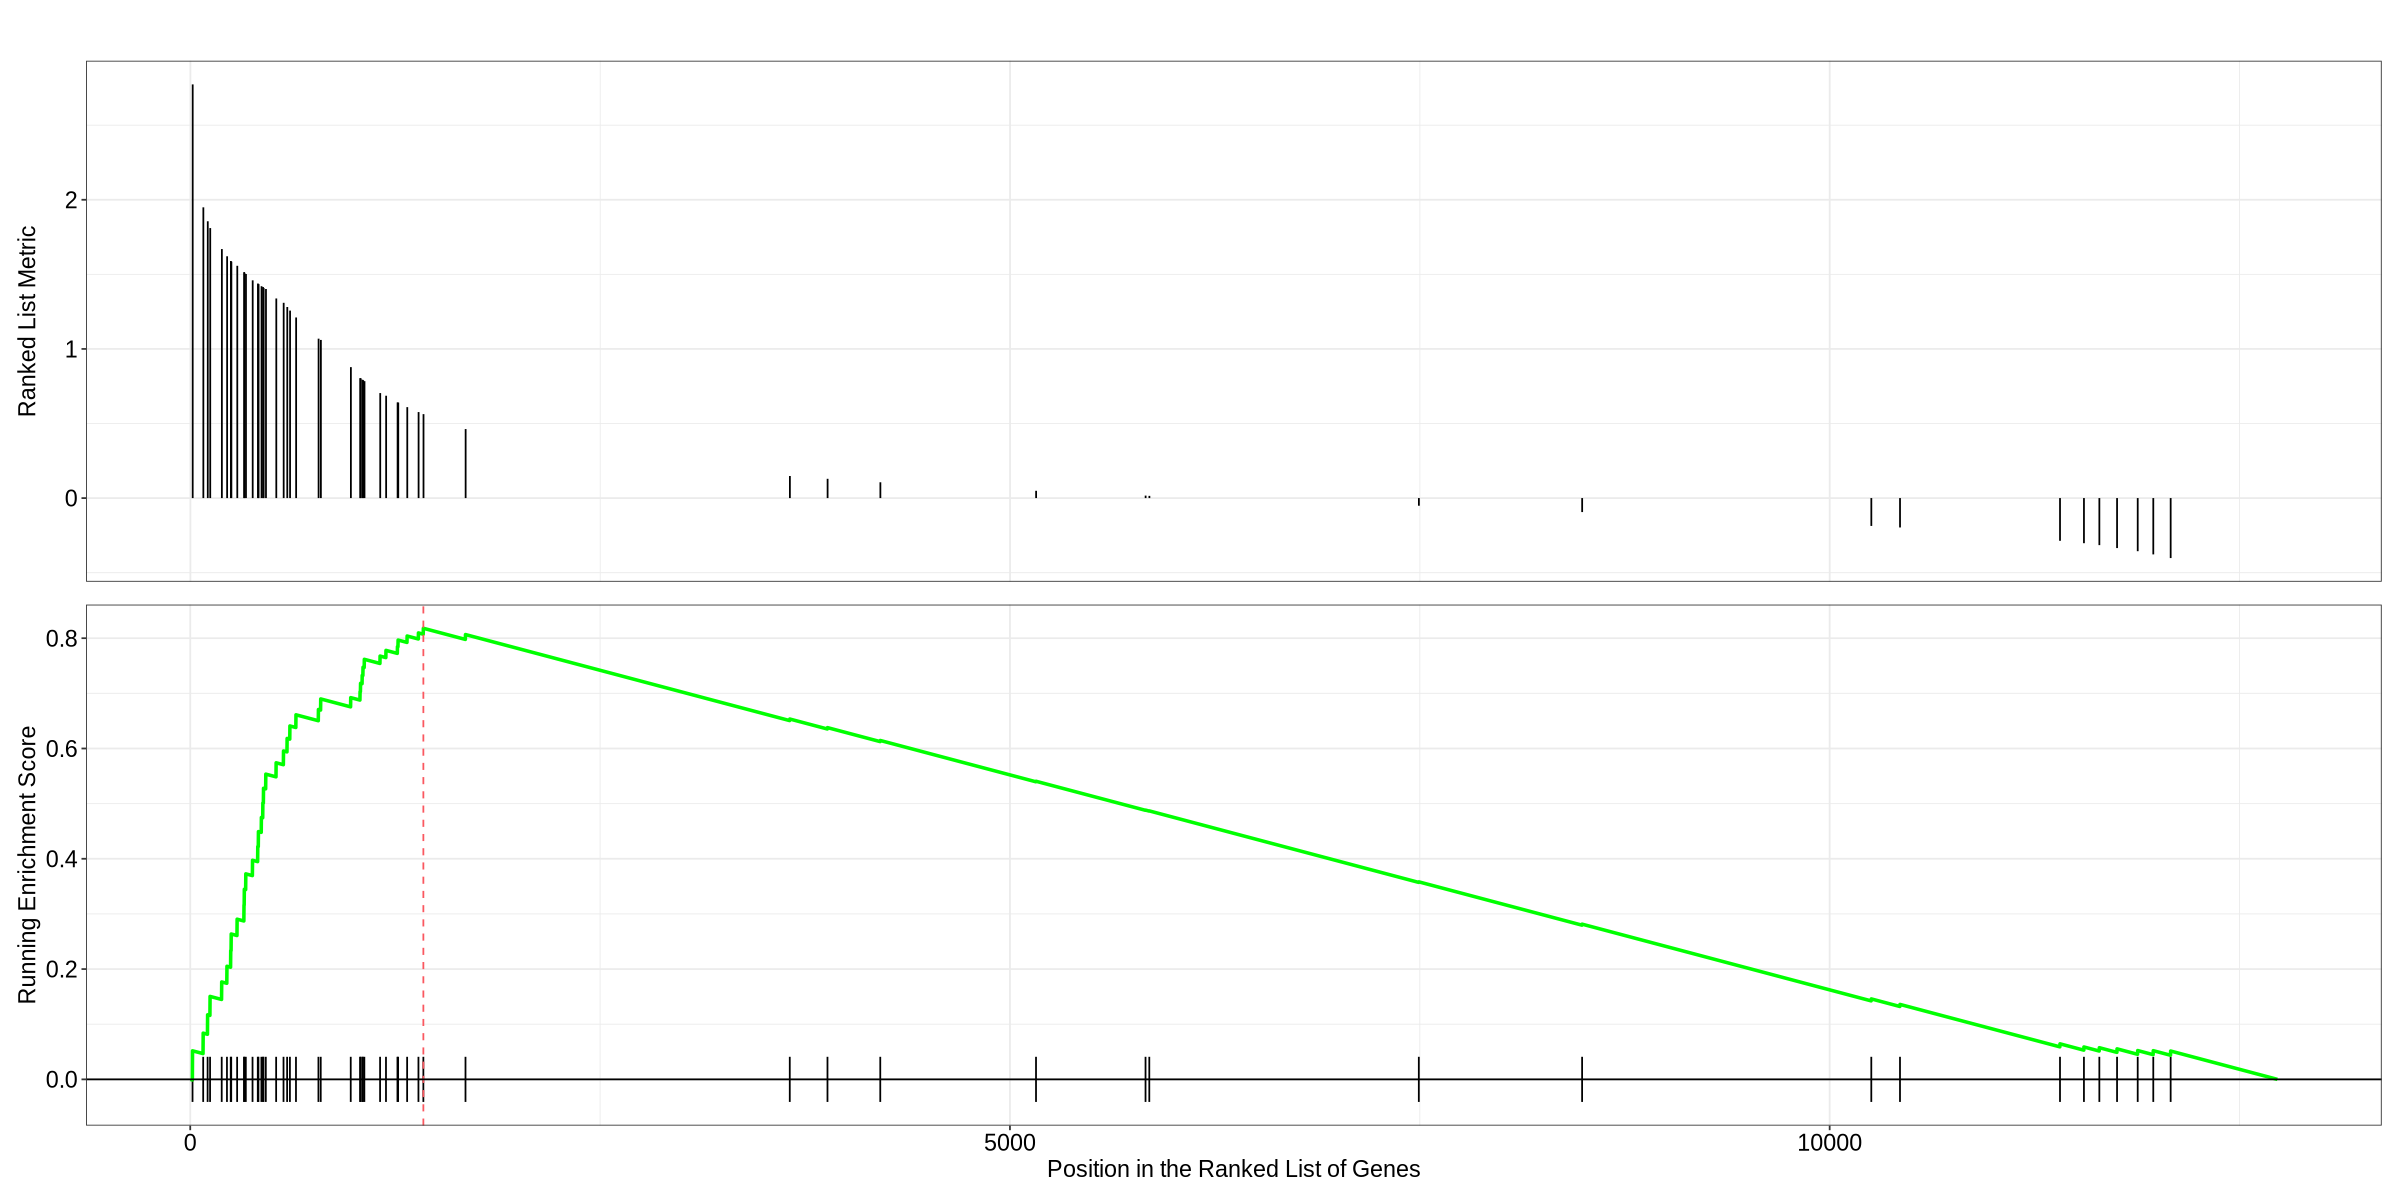

In [12]:
dotplot(gsea_results, showCategory=20)
gseaplot(gsea_results, geneSetID = gsea_results@result$ID[1])